In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import roc_curve,auc
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [0]:

url='https://raw.githubusercontent.com/scarface961/Bank-Marketting/master/bank-full.csv'
data = pd.read_csv(url,delimiter=';')
#data1 = pd.read_csv("D:/Data Mining and Concepts Learning/Project/bank/bank.csv")

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [0]:
data=pd.get_dummies(data, columns=["job","marital","education","default","housing","loan","contact","month","poutcome"])

labelencoder = LabelEncoder()
data['y'] = labelencoder.fit_transform(data['y'])

In [9]:
data

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
def epoch (history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [0]:
def dPCA(X_train,X_test):
    pca = PCA(n_components= 6)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    return X_train,X_test


In [0]:
def dSMOTE(X_train,y_train):
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    return X_train, y_train

In [0]:
def percentage_split_NN(percentage_split,X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)

  model= create_NN_model()
  history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=100)
  pred = model.predict_classes(x_test)
  tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()
  print("Percentage Split")
  Confusion_matrix(tn,fp,fn,tp)
  #epoch(history)
  

In [0]:
def crossvalidate_NN(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  for train, test in kfold.split(X, Y):
    model= create_NN_model()
    history = model.fit(X[train], Y[train],validation_data=(X[test],Y[test]),epochs=150, batch_size=100)
    pred = model.predict_classes(X[test])
    #evaluate the model
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],pred).ravel()
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1

    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)


In [0]:
def percentage_split_NN_PCA(percentage_split,X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
  x_train,x_test = dPCA(x_train,x_test)
  model= create_NN_model()
  history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=100)
  pred = model.predict_classes(x_test)
  tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()
  print("Percentage Split")
  Confusion_matrix(tn,fp,fn,tp)
  #epoch(history)
  

In [0]:
def crossvalidate_NN_PCA(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  for train, test in kfold.split(X, Y):
    x_train = X[train]
    x_test = X[test]
    x_train,x_test= dPCA(x_train,x_test)
    model= create_NN_model()
    history = model.fit(x_train, Y[train],validation_data=(x_test,Y[test]),epochs=150, batch_size=100)
    pred = model.predict_classes(x_test)
    #evaluate the model
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],pred).ravel()
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1

    scores = model.evaluate(x_test, Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)

In [0]:
def percentage_split_NN_SMOTE(percentage_split,X,Y):
  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
  x_train,y_train = dSMOTE(x_train,y_train)
  model= create_NN_model()
  history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=150, batch_size=100)
  pred = model.predict_classes(x_test)
  fpr_nn,tpr_nn ,thresholds_nn  = roc_curve(y_test,pred)
  auc_nn = auc(fpr_nn, tpr_nn)
  tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()

  print("Percentage Split")
  Confusion_matrix(tn,fp,fn,tp)
  print("AUC: "+repr(auc_nn))
  return  fpr_nn,tpr_nn ,thresholds_nn,auc_nn
  #epoch(history)
  

In [0]:
def crossvalidate_NN_SMOTE(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  fpr_nn = 0
  tpr_nn = 0
  thresholds_nn = 0
  auc_nn=0
  for train, test in kfold.split(X, Y):
    # x_train = X[train]
    # x_test = X[test]
    x_train,y_train= dSMOTE(X[train],Y[train])
    model= create_NN_model()
    history = model.fit(x_train, y_train,validation_data=(X[test],Y[test]),epochs=150, batch_size=100)
    pred = model.predict_classes(X[test])
    #evaluate the model
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],pred).ravel()
    fpr_nn1,tpr_nn1 ,thresholds_nn1  = roc_curve(Y[test],pred)
    auc_nn1 = auc(fpr_nn1, tpr_nn1)
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1
    fpr_nn = fpr_nn + fpr_nn1
    tpr_nn =  tpr_nn + tpr_nn1
    thresholds_nn =thresholds_nn + thresholds_nn1 
    auc_nn=auc_nn + auc_nn1

    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
  print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  fpr_nn = fpr_nn/folds
  tpr_nn = tpr_nn/folds
  thresholds_nn = thresholds_nn/folds
  auc_nn = auc_nn/folds 
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)
  print("AUC: "+repr(auc_nn))
  return  fpr_nn,tpr_nn ,thresholds_nn,auc_nn

In [0]:
def percentage_split_SVM(percentage_split,X,Y):

  x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
  clf = svm.SVC(kernel="linear")
  clf.fit(x_train, y_train)
  predict_svm = clf.predict(x_test)
  Confusion_matrix(y_test,predict_svm)


In [0]:
def crossvalidate_SVM(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  for train, test in kfold.split(X, Y):
    clf = svm.SVC(kernel="linear")
    clf.fit(X[train], Y[train])
    predict_svm = clf.predict(X[test])
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],predict_svm).ravel()
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1


    print("Acc: "+repr(accuracy_score(Y[test],predict_svm)))

  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)


In [0]:
def percentage_split_SVM_SMOTE(percentage_split,X,Y):

    x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
    x_train,y_train = dSMOTE(x_train,y_train)
    clf = svm.SVC(kernel="rbf")
    clf.fit(x_train, y_train)
    predict_svm = clf.predict(x_test)
    tn,fp,fn,tp = confusion_matrix(y_test,predict_svm).ravel()
    fpr_svm,tpr_svm ,thresholds_svm  = roc_curve(y_test,predict_svm)
    auc_svm = auc(fpr_svm, tpr_svm)
    tn,fp,fn,tp = confusion_matrix(y_test,predict_svm).ravel()

    print("Percentage Split")
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC: "+repr(auc_svm))
    return  fpr_svm,tpr_svm ,thresholds_svm,auc_svm

In [0]:
def crossvalidate_SVM_Smote(folds,X,Y):
  kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
  cvscores = []
  tn=0
  fp=0
  fn=0
  tp=0
  fpr_svm = 0
  tpr_svm = 0
  thresholds_svm = 0
  auc_svm=0
  for train, test in kfold.split(X, Y):
    x_train = X[train]
    y_train = Y[train]
    x_train,y_train= dSMOTE(x_train,y_train)
    clf = svm.SVC(kernel="rbf")
    clf.fit(x_train, y_train)
    predict_svm = clf.predict(X[test])
    tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],predict_svm).ravel()
    fpr_svm1,tpr_svm1 ,thresholds_svm1  = roc_curve(Y[test],predict_svm)
    auc_svm1 = auc(fpr_svm1, tpr_svm1)
    tn = tn+tn1
    fp = fp+fp1
    fn = fn+fn1
    tp = tp+tp1
    fpr_svm = fpr_svm + fpr_svm1
    tpr_svm =  tpr_svm + tpr_svm1
    thresholds_svm =thresholds_svm + thresholds_svm1 
    auc_svm=auc_svm + auc_svm1


    print("Acc: "+repr(accuracy_score(Y[test],predict_svm)))

  tn=tn/folds
  fp=fp/folds
  fn=fn/folds
  tp=tp/folds
  fpr_svm = fpr_svm/folds
  tpr_svm = tpr_svm/folds
  thresholds_svm = thresholds_svm/folds
  auc_svm = auc_svm/folds 
  print("Cross-validation")
  Confusion_matrix(tn,fp,fn,tp)
  print("AUC: "+repr(auc_svm))
  return  fpr_svm,tpr_svm ,thresholds_svm,auc_svm

In [0]:
def percentage_split_LogisticsRegression_SMOTE(percentage_split,X,Y):
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size = percentage_split,random_state=0)
    x_train,y_train = dSMOTE(x_train,y_train)
    clf = LogisticRegression(penalty = 'l2')
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    fpr_lr,tpr_lr ,thresholds_lr  = roc_curve(y_test,y_pred)
    auc_lr = auc(fpr_lr, tpr_lr)
    tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel()

    print("Percentage Split")
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC: "+repr(auc_lr))
    return  fpr_lr,tpr_lr ,thresholds_lr,auc_lr

In [0]:
def crossvalidate_LogisticsRegression_SMOTE(folds,X,Y):
      kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
      cvscores = []
      tn=0
      fp=0
      fn=0
      tp=0
      fpr_lr = 0
      tpr_lr = 0
      thresholds_lr = 0
      auc_lr=0
      for train, test in kfold.split(X, Y):
        
        x_train = X[train]
        y_train = Y[train]
        x_train,y_train= dSMOTE(x_train,y_train)
        clf = LogisticRegression(penalty = 'l2')
        clf.fit(x_train,y_train)
        y_pred = clf.predict(X[test])

        tn1, fp1, fn1, tp1 = confusion_matrix(Y[test],y_pred).ravel()
        fpr_lr1,tpr_lr1 ,thresholds_lr1  = roc_curve(Y[test],y_pred)
        auc_lr1 = auc(fpr_lr1, tpr_lr1)
        tn = tn+tn1
        fp = fp+fp1
        fn = fn+fn1
        tp = tp+tp1
        fpr_lr = fpr_lr + fpr_lr1
        tpr_lr =  tpr_lr + tpr_lr1
        thresholds_lr =thresholds_lr + thresholds_lr1 
        auc_lr=auc_lr + auc_lr1

        print("Acc: "+repr(accuracy_score(Y[test],y_pred)))

      tn=tn/folds
      fp=fp/folds
      fn=fn/folds
      tp=tp/folds
      fpr_lr = fpr_lr/folds
      tpr_lr = tpr_lr/folds
      thresholds_lr = thresholds_lr/folds
      auc_lr = auc_lr/folds 
      print("Cross-validation")
      Confusion_matrix(tn,fp,fn,tp)
      print("AUC: "+repr(auc_lr))
      return  fpr_lr,tpr_lr ,thresholds_lr,auc_lr

In [0]:
def DecisionTree_percentage_SMOTE(percentage,X, y):

    ##### Train & Test Split #####
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=0)
    
    ####### Handling Imbalanced Dataset ###########
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    
    clf = DecisionTreeClassifier(criterion= 'gini', max_depth=7, splitter='best', random_state=0)
    
    ######## WITH SMOTE ##########
#     print("ONLY SMOTE")
#     print("Criterion = 'gini', max_depth=7, splitter='best'")
#     print("-------------------------------------")
#     print("-------------------------------------")
#     print("")
    clf = clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print("")
    tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
    print("Confusion Matrix")
    print("   yes     no   <<-- Classified as   ")
    print("  ",tp,"  ",fn,"        yes")
    print("  ",fp,"  ",tn,"        no")
    print("")
    Accuracy_SMOTE = accuracy_score(y_test,predict)
    print("Accuracy Score:",Accuracy_SMOTE)
    Sensitivity_SMOTE = tp/(tp+fn)
    print("Sensitivity:", Sensitivity_SMOTE)
    print("Specificity:", tn/(tn+fp))
    print("")
    print("F1 Score:",f1_score(y_test, predict))
    #print("Log Loss:",log_loss(y_test, predict, eps=1e-15, normalize=True, sample_weight=None, labels=None))
    print("Precision:",precision_score(y_test, predict))
    #print("Recall:",recall_score(y_test, predict))
    auc= roc_auc_score(y_test, predict)
    print("AUC:",roc_auc_score(y_test, predict))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
#     print("True Positive Rate:",tpr.mean())
#     print("False Positive Rate:",fpr.mean())
#     print("Threshold:",thresholds.mean())
#     print("CLASSIFICATION REPORT")
#     print(classification_report(y_test, predict))
#     print("")
    return tpr, fpr, thresholds, auc





In [0]:
########## K-Folds CV on Raw Data WITH SMOTE##########
def DecisionTree_crossvalidation_SMOTE(folds,X, y):
#     print("WITH ONLY SMOTE")
#     print("-------------------------------------")
#     print("-------------------------------------")
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    tn=0
    fp=0
    fn=0
    tp=0
    fpr_dt = 0
    tpr_dt = 0
    thresholds_dt = 0
    auc_dt=0
    clf = DecisionTreeClassifier(criterion= 'gini', max_depth=7, splitter='best', random_state=0)
    
    for train, test in kfold.split(X, y):
      X_train = X[train]
      y_train = y[train]
      X_train,y_train = dSMOTE(X_train,y_train)
      clf.fit(X_train, y_train)
      predict = clf.predict(X[test])
      fpr_dt1,tpr_dt1 ,thresholds_dt1 = metrics.roc_curve(y[test],predict)
      auc_dt1 = roc_auc_score(y[test], predict)
      tn1, fp1, fn1, tp1 = confusion_matrix(y[test],predict).ravel()
      tn = tn+tn1
      fp = fp+fp1
      fn = fn+fn1
      tp = tp+tp1
      fpr_dt = fpr_dt + fpr_dt1
      tpr_dt =  tpr_dt + tpr_dt1
      thresholds_dt = thresholds_dt + thresholds_dt1
      auc_dt=auc_dt + auc_dt1
      print("Acc: "+repr(accuracy_score(y[test],predict)))
    print("")
    tn=tn/folds
    fp=fp/folds
    fn=fn/folds
    tp=tp/folds
    fpr_dt = fpr_dt/folds
    tpr_dt = tpr_dt/folds
    thresholds_dt = thresholds_dt/folds
    auc_dt = auc_dt/folds
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC:",auc_dt)
    return tpr_dt, fpr_dt, thresholds_dt, auc_dt

In [0]:
def KNN_percentage_SMOTE(percent,X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=percent, random_state=0)
    
    smt = SMOTE()
    X_train, y_train = smt.fit_sample(X_train, y_train)
    
    clf = KNeighborsClassifier(algorithm="kd_tree", metric="euclidean", n_neighbors=7)
    
    ##### Training#####
    clf = clf.fit(X_train, y_train)
    
    ##### Testing and accuracy #####
    predict = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
    print("Confusion Matrix")
    print("   yes     no   <<-- Classified as   ")
    print("  ",tp,"  ",fn,"        yes")
    print("  ",fp,"  ",tn,"        no")
    print("")
    Accuracy_SMOTE = accuracy_score(y_test,predict)
    print("Accuracy Score:",Accuracy_SMOTE)
    Sensitivity_SMOTE = tp/(tp+fn)
    print("Sensitivity:", Sensitivity_SMOTE)
    print("Specificity:", tn/(tn+fp))
    print("")
    print("F1 Score:",f1_score(y_test, predict))
    print("Precision:",precision_score(y_test, predict))
    #print("Recall:",recall_score(y_test, predict))
    auc = roc_auc_score(y_test, predict)
    print("AUC:",auc)
    print("")
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predict)
#     print("True Positive Rate:",tpr)
#     print("False Positive Rate:",fpr)
#     print("Threshold:",thresholds)
    print("")
    return tpr, fpr, thresholds, auc

In [0]:
def KNN_crossvalidation_SMOTE(folds,X, y):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)
    tn=0
    fp=0
    fn=0
    tp=0
    fpr_knn = 0
    tpr_knn = 0
    thresholds_knn = 0
    auc_knn=0
    clf = KNeighborsClassifier(algorithm="kd_tree", metric="euclidean", n_neighbors=7)
    
    for train, test in kfold.split(X, y):
      X_train = X[train]
      y_train = y[train]
      X_train,y_train = dSMOTE(X_train,y_train)
      clf.fit(X_train, y_train)
      predict = clf.predict(X[test])
      fpr_knn1,tpr_knn1 ,thresholds_knn1 = metrics.roc_curve(y[test],predict)
      auc_knn1 = roc_auc_score(y[test], predict)
      tn1, fp1, fn1, tp1 = confusion_matrix(y[test],predict).ravel()
      tn = tn+tn1
      fp = fp+fp1
      fn = fn+fn1
      tp = tp+tp1
      fpr_knn = fpr_knn + fpr_knn1
      tpr_knn =  tpr_knn + tpr_knn1
      thresholds_knn = thresholds_knn + thresholds_knn1
      auc_knn=auc_knn + auc_knn1
      print("Acc: "+repr(accuracy_score(y[test],predict)))
    print("")
    tn=tn/folds
    fp=fp/folds
    fn=fn/folds
    tp=tp/folds
    fpr_knn = fpr_knn/folds
    tpr_knn = tpr_knn/folds
    thresholds_knn = thresholds_knn/folds
    auc_knn = auc_knn/folds
    Confusion_matrix(tn,fp,fn,tp)
    print("AUC:",auc_knn)
    return tpr_knn, fpr_knn, thresholds_knn, auc_knn

In [0]:
def Confusion_matrix(tn, fp, fn, tp):
  #tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
  print("Confusion Matrix")
  print("   yes     no   <<-- Classified as   ")
  # print("   %.2f    %.2f  yes" %(tp,fn))
  # print("   %.2f    %.2f  no" %(fp,tn))
  print("   "+repr(int(tp))+"    "+repr(int(fn))+"        yes")
  print("   "+repr(int(fp))+"    "+repr(int(tn))+"        no")
  accuracy = float((tp+tn)/(tp+tn+fp+fn))
  specificity = float(tn / (tn+fp))
  sensitivity = float(tp / (tp+fn))
  
  if (tp+fp)>=0:
    precision = float(tp / (tp+fp))
    f_score = (2*precision*sensitivity)/(precision+sensitivity) 
  else:
    precision = 0
    f_score = "?"
 
  #print(classification_report(y_test,predictions))
  print("Accuracy: "+repr(accuracy))
  print("Sensitivity: "+repr(sensitivity))
  print("Specificity: "+repr(specificity))
  print("Precision: "+repr(precision))
  print("f_score: "+repr(f_score))

In [0]:
def create_NN_model():
  #Keras Multi Layer
  model = Sequential()
  model.add(Dense(5,input_dim=51,activation='tanh'))
  model.add(Dense(5, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  #keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  #sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
  a = optimizers.adam(lr=0.007)
  model.compile(loss='binary_crossentropy', optimizer=a, metrics=['accuracy'])
  return model


In [31]:
# Splitting the data labels and dataset
Y = data.y.values
X= data.drop('y',axis = 1).values
# X = data.iloc[:,0:53]
# Y = data.iloc[:,52:53]
# print(X)
# #Normalize
# from sklearn import preprocessing
# X = preprocessing.scale(X)
# print(Y)
from sklearn import preprocessing
X = preprocessing.scale(X)
X



array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.22802402,  0.14341818, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857,  0.52836436,  0.14341818, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [0]:
percentage_split_NN(0.25,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Train on 33908 samples, validate on 11303 samples
Epoch 1/150
33908/33908 [==============================] - 1s 23us/step - loss: 0.2529 - acc: 0.8904 - val_loss: 0.2251 - val_acc: 0.8974
Epoch 2/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.2165 - acc: 0.9039 - val_loss: 0.2163 - val_acc: 0.9010
Epoch 3/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.2098 - acc: 0.9064 - val_loss: 0.2149 - val_acc: 0.9006
Epoch 4/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.2053 - acc: 0.9080 - val_loss: 0.2147 - val_acc: 0.9013
Epoch 5/150
33908/33908 [==============================] - 1s 18us/step - loss: 0.2016 - acc: 0.9108 - val_loss: 0.2117 - val_acc: 0.9023
Epoch 6/150
33908/33908 [==============================] - 1s 17us/step - loss: 0.1986 - acc: 0.9117 - val_loss: 0.2140 - val_acc: 0.9023
Epoch 7/150
33908/33908 [==============================] - 1s 16us/step - loss: 0.1959 - acc: 0.9135 - val_loss: 0.2128 - 

In [0]:
crossvalidate_NN(10,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Train on 40689 samples, validate on 4522 samples
Epoch 1/150
40689/40689 [==============================] - 6s 141us/step - loss: 0.2573 - acc: 0.8895 - val_loss: 0.2255 - val_acc: 0.9027
Epoch 2/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2171 - acc: 0.9012 - val_loss: 0.2155 - val_acc: 0.9045
Epoch 3/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2118 - acc: 0.9027 - val_loss: 0.2112 - val_acc: 0.9034
Epoch 4/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2097 - acc: 0.9035 - val_loss: 0.2111 - val_acc: 0.9067
Epoch 5/150
40689/40689 [==============================] - 1s 22us/step - loss: 0.2078 - acc: 0.9039 - val_loss: 0.2120 - val_acc: 0.9054
Epoch 6/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2067 - acc: 0.9057 - val_loss: 0.2126 - val_acc: 0.9076
Epoch 7/150
40689/40689 [==============================] - 1s 21us/step - loss: 0.2065 - acc: 0.9049 - val_loss: 0.2096 - 

In [19]:
percentage_split_NN_PCA(0.25,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')




Train on 33908 samples, validate on 11303 samples
Epoch 1/150





33908/33908 [==============================] - 1s 23us/step - loss: 0.3686 - acc: 0.8585 - val_loss: 0.3165 - val_acc: 0.8859
Epoch 2/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3146 - acc: 0.8872 - val_loss: 0.3148 - val_acc: 0.8841
Epoch 3/150
33908/33908 [==============================] - 0s 14us/step - loss: 0.3115 - acc: 0.8865 - val_loss: 0.3121 - val_acc: 0.8846
Epoch 4/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3098 - acc: 0.8867 - val_loss: 0.3116 - val_acc: 0.8860
Epoch 5/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3091 - acc: 0.8858 - val_loss: 0.3111 - val_acc: 0.8827
Epoch 6/150
33908/33908 [==============================] - 1s 15us/step - loss: 0.3089 - acc: 0.8860 - val_loss: 0.3115 - val_acc: 0.8826
Epoch 7/150
33908/33908 [==============================] - 0s 15us/step - loss: 0.3083 - acc: 0.8870 - val_loss: 0

In [20]:
crossvalidate_NN_PCA(10,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

Train on 40689 samples, validate on 4522 samples
Epoch 1/150
40689/40689 [==============================] - 1s 19us/step - loss: 0.3348 - acc: 0.8761 - val_loss: 0.3214 - val_acc: 0.8824
Epoch 2/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3127 - acc: 0.8854 - val_loss: 0.3186 - val_acc: 0.8837
Epoch 3/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3114 - acc: 0.8845 - val_loss: 0.3173 - val_acc: 0.8839
Epoch 4/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3112 - acc: 0.8846 - val_loss: 0.3178 - val_acc: 0.8819
Epoch 5/150
40689/40689 [==============================] - 1s 13us/step - loss: 0.3109 - acc: 0.8847 - val_loss: 0.3164 - val_acc: 0.8830
Epoch 6/150
40689/40689 [==============================] - 1s 15us/step - loss: 0.3103 - acc: 0.8850 - val_loss: 0.3149 - val_acc: 0.8861
Epoch 7/150
40689/40689 [==============================] - 1s 14us/step - loss: 0.3097 - acc: 0.8858 - val_loss: 0.3141 - v

In [47]:
fpr_nn_p,tpr_nn_p ,thresholds_nn_p,auc_nn_p=percentage_split_NN_SMOTE(0.25,X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 59882 samples, validate on 11303 samples
Epoch 1/150
59882/59882 [==============================] - 3s 46us/step - loss: 0.3598 - acc: 0.8466 - val_loss: 0.3613 - val_acc: 0.8263
Epoch 2/150
59882/59882 [==============================] - 1s 17us/step - loss: 0.3136 - acc: 0.8711 - val_loss: 0.3614 - val_acc: 0.8283
Epoch 3/150
59882/59882 [==============================] - 1s 18us/step - loss: 0.3037 - acc: 0.8764 - val_loss: 0.3599 - val_acc: 0.8284
Epoch 4/150
59882/59882 [==============================] - 1s 17us/step - loss: 0.2993 - acc: 0.8791 - val_loss: 0.3326 - val_acc: 0.8368
Epoch 5/150
59882/59882 [==============================] - 1s 17us/step - loss: 0.2968 - acc: 0.8798 - val_loss: 0.3394 - val_acc: 0.8331
Epoch 6/150
59882/59882 [==============================] - 1s 18us/step - loss: 0.2950 - acc: 0.8802 - val_loss: 0.3529 - val_acc: 0.8328
Epoch 7/150
59882/59882 [==============================] - 1s 18us/step - loss: 0.2945 - acc: 0.8813 - val_loss: 0.3461 - 

In [51]:
fpr_nn_c,tpr_nn_c ,thresholds_nn_c,auc_nn_c=crossvalidate_NN_SMOTE(10,X,Y)
print()
print()
print()
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71858 samples, validate on 4522 samples
Epoch 1/150
71858/71858 [==============================] - 3s 44us/step - loss: 0.3632 - acc: 0.8452 - val_loss: 0.3776 - val_acc: 0.8253
Epoch 2/150
71858/71858 [==============================] - 1s 17us/step - loss: 0.3182 - acc: 0.8712 - val_loss: 0.3572 - val_acc: 0.8339
Epoch 3/150
71858/71858 [==============================] - 1s 16us/step - loss: 0.3071 - acc: 0.8764 - val_loss: 0.3475 - val_acc: 0.8366
Epoch 4/150
71858/71858 [==============================] - 1s 18us/step - loss: 0.3037 - acc: 0.8770 - val_loss: 0.3410 - val_acc: 0.8470
Epoch 5/150
71858/71858 [==============================] - 1s 17us/step - loss: 0.3015 - acc: 0.8784 - val_loss: 0.3434 - val_acc: 0.8430
Epoch 6/150
71858/71858 [==============================] - 1s 17us/step - loss: 0.2996 - acc: 0.8786 - val_loss: 0.3591 - val_acc: 0.8317
Epoch 7/150
71858/71858 [==============================] - 1s 17us/step - loss: 0.2989 - acc: 0.8791 - val_loss: 0.3369 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71858 samples, validate on 4521 samples
Epoch 1/150
71858/71858 [==============================] - 3s 45us/step - loss: 0.3522 - acc: 0.8518 - val_loss: 0.3745 - val_acc: 0.8319
Epoch 2/150
71858/71858 [==============================] - 1s 17us/step - loss: 0.3129 - acc: 0.8732 - val_loss: 0.3712 - val_acc: 0.8246
Epoch 3/150
71858/71858 [==============================] - 1s 18us/step - loss: 0.3066 - acc: 0.8761 - val_loss: 0.3871 - val_acc: 0.8197
Epoch 4/150
71858/71858 [==============================] - 1s 17us/step - loss: 0.3039 - acc: 0.8786 - val_loss: 0.3584 - val_acc: 0.8303
Epoch 5/150
71858/71858 [==============================] - 1s 16us/step - loss: 0.3023 - acc: 0.8784 - val_loss: 0.3598 - val_acc: 0.8211
Epoch 6/150
71858/71858 [==============================] - 1s 16us/step - loss: 0.3007 - acc: 0.8792 - val_loss: 0.3536 - val_acc: 0.8326
Epoch 7/150
71858/71858 [==============================] - 1s 16us/step - loss: 0.3001 - acc: 0.8792 - val_loss: 0.3610 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 3s 45us/step - loss: 0.3547 - acc: 0.8514 - val_loss: 0.3619 - val_acc: 0.8315
Epoch 2/150
71860/71860 [==============================] - 1s 16us/step - loss: 0.3180 - acc: 0.8698 - val_loss: 0.3652 - val_acc: 0.8306
Epoch 3/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3093 - acc: 0.8747 - val_loss: 0.3416 - val_acc: 0.8423
Epoch 4/150
71860/71860 [==============================] - 1s 16us/step - loss: 0.3048 - acc: 0.8777 - val_loss: 0.3557 - val_acc: 0.8394
Epoch 5/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3028 - acc: 0.8785 - val_loss: 0.3560 - val_acc: 0.8401
Epoch 6/150
71860/71860 [==============================] - 1s 16us/step - loss: 0.3005 - acc: 0.8801 - val_loss: 0.3408 - val_acc: 0.8456
Epoch 7/150
71860/71860 [==============================] - 1s 16us/step - loss: 0.2998 - acc: 0.8791 - val_loss: 0.3208 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 3s 45us/step - loss: 0.3596 - acc: 0.8462 - val_loss: 0.3805 - val_acc: 0.8146
Epoch 2/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3159 - acc: 0.8700 - val_loss: 0.3490 - val_acc: 0.8326
Epoch 3/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3050 - acc: 0.8773 - val_loss: 0.3454 - val_acc: 0.8279
Epoch 4/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3034 - acc: 0.8781 - val_loss: 0.3396 - val_acc: 0.8326
Epoch 5/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3015 - acc: 0.8784 - val_loss: 0.3261 - val_acc: 0.8405
Epoch 6/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3007 - acc: 0.8790 - val_loss: 0.3419 - val_acc: 0.8376
Epoch 7/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3003 - acc: 0.8791 - val_loss: 0.3417 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 3s 47us/step - loss: 0.3543 - acc: 0.8486 - val_loss: 0.3790 - val_acc: 0.8191
Epoch 2/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3145 - acc: 0.8701 - val_loss: 0.3296 - val_acc: 0.8456
Epoch 3/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3056 - acc: 0.8749 - val_loss: 0.3429 - val_acc: 0.8370
Epoch 4/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3018 - acc: 0.8761 - val_loss: 0.3453 - val_acc: 0.8385
Epoch 5/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.2988 - acc: 0.8778 - val_loss: 0.3326 - val_acc: 0.8458
Epoch 6/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.2974 - acc: 0.8775 - val_loss: 0.3377 - val_acc: 0.8449
Epoch 7/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.2967 - acc: 0.8775 - val_loss: 0.3589 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 3s 45us/step - loss: 0.3577 - acc: 0.8465 - val_loss: 0.3368 - val_acc: 0.8385
Epoch 2/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3196 - acc: 0.8665 - val_loss: 0.3249 - val_acc: 0.8430
Epoch 3/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3090 - acc: 0.8721 - val_loss: 0.3253 - val_acc: 0.8522
Epoch 4/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3032 - acc: 0.8748 - val_loss: 0.3299 - val_acc: 0.8560
Epoch 5/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3015 - acc: 0.8763 - val_loss: 0.3208 - val_acc: 0.8505
Epoch 6/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3012 - acc: 0.8763 - val_loss: 0.3419 - val_acc: 0.8430
Epoch 7/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3001 - acc: 0.8763 - val_loss: 0.3166 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 3s 46us/step - loss: 0.3538 - acc: 0.8484 - val_loss: 0.3606 - val_acc: 0.8279
Epoch 2/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3129 - acc: 0.8714 - val_loss: 0.3735 - val_acc: 0.8266
Epoch 3/150
71860/71860 [==============================] - 1s 19us/step - loss: 0.3057 - acc: 0.8748 - val_loss: 0.3609 - val_acc: 0.8343
Epoch 4/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3024 - acc: 0.8762 - val_loss: 0.3405 - val_acc: 0.8381
Epoch 5/150
71860/71860 [==============================] - 1s 16us/step - loss: 0.3000 - acc: 0.8773 - val_loss: 0.3669 - val_acc: 0.8290
Epoch 6/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.2982 - acc: 0.8781 - val_loss: 0.3841 - val_acc: 0.8166
Epoch 7/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.2976 - acc: 0.8787 - val_loss: 0.3592 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 4s 49us/step - loss: 0.3559 - acc: 0.8492 - val_loss: 0.3841 - val_acc: 0.8182
Epoch 2/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3197 - acc: 0.8682 - val_loss: 0.3359 - val_acc: 0.8447
Epoch 3/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3120 - acc: 0.8721 - val_loss: 0.3530 - val_acc: 0.8388
Epoch 4/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3094 - acc: 0.8738 - val_loss: 0.3239 - val_acc: 0.8474
Epoch 5/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3076 - acc: 0.8748 - val_loss: 0.3571 - val_acc: 0.8388
Epoch 6/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3066 - acc: 0.8755 - val_loss: 0.3705 - val_acc: 0.8284
Epoch 7/150
71860/71860 [==============================] - 1s 19us/step - loss: 0.3052 - acc: 0.8778 - val_loss: 0.3119 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 4s 52us/step - loss: 0.3562 - acc: 0.8466 - val_loss: 0.3660 - val_acc: 0.8264
Epoch 2/150
71860/71860 [==============================] - 1s 20us/step - loss: 0.3149 - acc: 0.8717 - val_loss: 0.3719 - val_acc: 0.8281
Epoch 3/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3050 - acc: 0.8756 - val_loss: 0.3312 - val_acc: 0.8405
Epoch 4/150
71860/71860 [==============================] - 1s 17us/step - loss: 0.3009 - acc: 0.8785 - val_loss: 0.3557 - val_acc: 0.8330
Epoch 5/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.2990 - acc: 0.8786 - val_loss: 0.3706 - val_acc: 0.8286
Epoch 6/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.2975 - acc: 0.8794 - val_loss: 0.3597 - val_acc: 0.8410
Epoch 7/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.2961 - acc: 0.8801 - val_loss: 0.3462 - v

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Train on 71860 samples, validate on 4521 samples
Epoch 1/150
71860/71860 [==============================] - 4s 54us/step - loss: 0.3570 - acc: 0.8471 - val_loss: 0.3573 - val_acc: 0.8321
Epoch 2/150
71860/71860 [==============================] - 1s 20us/step - loss: 0.3173 - acc: 0.8685 - val_loss: 0.3593 - val_acc: 0.8381
Epoch 3/150
71860/71860 [==============================] - 1s 20us/step - loss: 0.3101 - acc: 0.8720 - val_loss: 0.3346 - val_acc: 0.8507
Epoch 4/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3053 - acc: 0.8763 - val_loss: 0.3651 - val_acc: 0.8370
Epoch 5/150
71860/71860 [==============================] - 1s 18us/step - loss: 0.3015 - acc: 0.8777 - val_loss: 0.3259 - val_acc: 0.8507
Epoch 6/150
71860/71860 [==============================] - 1s 19us/step - loss: 0.2982 - acc: 0.8790 - val_loss: 0.3271 - val_acc: 0.8500
Epoch 7/150
71860/71860 [==============================] - 1s 19us/step - loss: 0.2968 - acc: 0.8787 - val_loss: 0.3171 - v

In [54]:
fpr_svm_p,tpr_svm_p ,thresholds_svm_p,auc_svm_p = percentage_split_SVM_SMOTE(0.25,X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Percentage Split
Confusion Matrix
   yes     no   <<-- Classified as   
   1054    268        yes
   1267    8714        no
Accuracy: 0.8641953463682208
Sensitivity: 0.7972768532526475
Specificity: 0.8730588117423104
Precision: 0.45411460577337354
f_score: 0.5786439747460884
AUC: 0.835167832497479


In [60]:
fpr_svm_c,tpr_svm_c ,thresholds_svm_c,auc_svm_c=crossvalidate_SVM_Smote(10,X,Y)

Acc: 0.8664307828394515
Acc: 0.8604291086042911
Acc: 0.8604291086042911
Acc: 0.865074098650741
Acc: 0.8630833886308339
Acc: 0.8743640787436407
Acc: 0.8560053085600531
Acc: 0.8686131386861314
Acc: 0.8624198186241981
Acc: 0.8661800486618005
Cross-validation
Confusion Matrix
   yes     no   <<-- Classified as   
   417    111        yes
   502    3489        no
Accuracy: 0.8643029351264072
Sensitivity: 0.7901304594441293
Specificity: 0.8741295526276238
Precision: 0.45404172099087353
f_score: 0.576692196232664
AUC: 0.832128718513049


In [66]:
fpr_lr_p,tpr_lr_p ,thresholds_lr_p,auc_lr_p = percentage_split_LogisticsRegression_SMOTE(0.25,X,Y)

Percentage Split
Confusion Matrix
   yes     no   <<-- Classified as   
   1085    237        yes
   1514    8467        no
Accuracy: 0.8450853755640095
Sensitivity: 0.8207261724659607
Specificity: 0.8483117924055705
Precision: 0.4174682570219315
f_score: 0.553430247385871
AUC: 0.8345189824357655


In [68]:
fpr_lr_c,tpr_lr_c ,thresholds_lr_c,auc_lr_c = crossvalidate_LogisticsRegression_SMOTE(10,X,Y)

Acc: 0.8463069438301637
Acc: 0.8374253483742535
Acc: 0.847378898473789
Acc: 0.8504755585047555
Acc: 0.8425127184251272
Acc: 0.8568900685689007
Acc: 0.8447246184472462
Acc: 0.8560053085600531
Acc: 0.8372041583720415
Acc: 0.8431762884317628
Cross-validation
Confusion Matrix
   yes     no   <<-- Classified as   
   428    100        yes
   595    3396        no
Accuracy: 0.8462099931432616
Sensitivity: 0.8109283418415579
Specificity: 0.8508842242372627
Precision: 0.4187658660417888
f_score: 0.5523147253879338
AUC: 0.8309041896412452


In [37]:
tpr_dt_p, fpr_dt_p, threshold_dt_p, auc_dt_p = DecisionTree_percentage_SMOTE(0.25,X, Y)


Confusion Matrix
   yes     no   <<-- Classified as   
   1067    255         yes
   1870    8111         no

Accuracy Score: 0.811996815004866
Sensitivity: 0.8071104387291982
Specificity: 0.8126440236449254

F1 Score: 0.501056586053064
Precision: 0.36329588014981273
AUC: 0.8098772311870618


In [38]:
tpr_dt_c, fpr_dt_c, threshold_dt_c, auc_dt_c = DecisionTree_crossvalidation_SMOTE(10,X, Y)

Acc: 0.8341441839893853
Acc: 0.827471798274718
Acc: 0.8376465383764654
Acc: 0.8276929882769298
Acc: 0.8234903782349038
Acc: 0.8352134483521345
Acc: 0.822826808228268
Acc: 0.8232691882326919
Acc: 0.8389736783897368
Acc: 0.8440610484406105

Confusion Matrix
   yes     no   <<-- Classified as   
   411    117        yes
   644    3347        no
Accuracy: 0.8314790648293556
Sensitivity: 0.7778408016638306
Specificity: 0.8385852412203797
Precision: 0.3896571320325819
f_score: 0.5192149933741401
AUC: 0.8082119883581693


In [32]:
tpr_knn_p, fpr_knn_p, threshold_knn_p, auc_knn_p = KNN_percentage_SMOTE(0.25,X, Y)

Confusion Matrix
   yes     no   <<-- Classified as   
   927    395         yes
   1585    8396         no

Accuracy Score: 0.8248252676280633
Sensitivity: 0.7012102874432677
Specificity: 0.841198276725779

F1 Score: 0.4835680751173709
Precision: 0.3690286624203822
AUC: 0.7712042820845233




In [40]:
tpr_knn_c, fpr_knn_c, threshold_knn_c, auc_knn_c = KNN_crossvalidation_SMOTE(10,X, Y)

Acc: 0.8270676691729323
Acc: 0.816412298164123
Acc: 0.8279141782791418
Acc: 0.82304799823048
Acc: 0.8301260783012607
Acc: 0.8316744083167441
Acc: 0.8206149082061491
Acc: 0.8327803583278036
Acc: 0.8237115682371157
Acc: 0.8237115682371157

Confusion Matrix
   yes     no   <<-- Classified as   
   375    153        yes
   634    3357        no
Accuracy: 0.8257061334630953
Sensitivity: 0.7093968614104745
Specificity: 0.8411151745904515
Precision: 0.3716691431401684
f_score: 0.48777951118044727
AUC: 0.7752558455735272


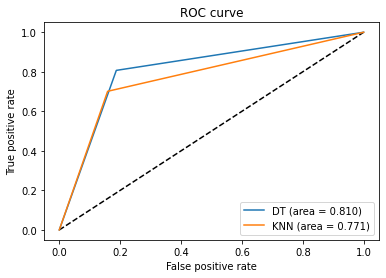

In [42]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(fpr_nn_p, tpr_nn_p, label='NN (area = {:.3f})'.format(auc_nn_p))
#plt.plot(fpr_svm_p, tpr_svm_p, label='SVM (area = {:.3f})'.format(auc_svm_p))
#plt.plot(fpr_lr_p, tpr_lr_p, label='LR (area = {:.3f})'.format(auc_lr_p))
plt.plot(fpr_dt_p, tpr_dt_p, label='DT (area = {:.3f})'.format(auc_dt_p))
plt.plot(fpr_knn_p, tpr_knn_p, label='KNN (area = {:.3f})'.format(auc_knn_p))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

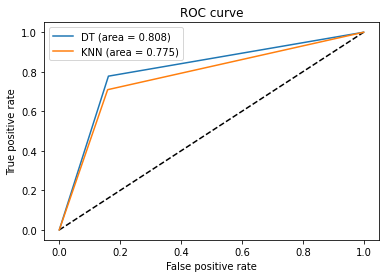

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')

#plt.plot(fpr_nn_c, tpr_nn_c, label='NN (area = {:.3f})'.format(auc_nn_c))
#plt.plot(fpr_svm_c, tpr_svm_c, label='SVM (area = {:.3f})'.format(auc_svm_c))
#plt.plot(fpr_lr_c, tpr_lr_c, label='LR (area = {:.3f})'.format(auc_lr_c))
plt.plot(fpr_dt_c, tpr_dt_c, label='DT (area = {:.3f})'.format(auc_dt_c))
plt.plot(fpr_knn_c, tpr_knn_c, label='KNN (area = {:.3f})'.format(auc_knn_c))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
# clf = svm.SVC(kernel="linear")
# clf.fit(x_train, y_train)
# predict_svm = clf.predict(x_test)

In [0]:
# Confusion_matrix(y_test,predict_svm)

Confusion Matrix
   0     1   << Classified as   
   29    101
   35    966
Accuracy: 0.8797524314765695
Sensitivity: 0.2230769230769231
Specificity: 0.965034965034965


In [0]:
# crossvalidate_SVM(10,X,Y)

Acc: 0.8741721854304636
Acc: 0.8761061946902655
Acc: 0.8849557522123894
Acc: 0.8938053097345132
Acc: 0.8915929203539823
Acc: 0.8738938053097345
Acc: 0.8761061946902655
Acc: 0.8938053097345132
Acc: 0.8938053097345132
Acc: 0.8938053097345132
Cross-validation
Confusion Matrix
   0     1   << Classified as   
   15    37
   14    385
Accuracy: 0.8815207780725022
Sensitivity: 0.28982725527831094
Specificity: 0.9627500000000001
